# Used packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from SALib.analyze import sobol
from ema_workbench.analysis import feature_scoring, RuleInductionType
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
    Scenario,
    Samplers,
    perform_experiments
)
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.em_framework.parameters import Constant
import pickle

# Feature important

In [2]:
# Use get_model_for_problem_formulation function to get a workable version of the model for the EMA workbench
dike_model, planning_steps = get_model_for_problem_formulation(6)

In [3]:
# Loads the reference scenarios used in the experiments
with open("data\ScenariosOpenExplo", 'rb') as f:
    scen_prim = pickle.load(f)
scen_prim.pop(2)

Scenario({'discount rate 0': 3.5, 'discount rate 1': 3.5, 'discount rate 2': 3.5, 'A.0_ID flood wave shape': 17, 'A.1_Bmax': 190.0, 'A.1_pfail': 0.5, 'A.1_Brate': 1.5, 'A.2_Bmax': 190.0, 'A.2_pfail': 0.5498741874471307, 'A.2_Brate': 1.5, 'A.3_Bmax': 190.0, 'A.3_pfail': 0.6347090611234307, 'A.3_Brate': 1.5, 'A.4_Bmax': 190.0, 'A.4_pfail': 0.5499818336684257, 'A.4_Brate': 1.5, 'A.5_Bmax': 190.0, 'A.5_pfail': 0.156920283799991, 'A.5_Brate': 1.5})

In [5]:
# Runs the experiments with reference scenarios and 2500 configurations of the policies using LHS sampling
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scen_prim,25000,uncertainty_sampling=Samplers.LHS)

experiments, outcomes = results

#Saves the results of the experiments
with open('./data/LHS_Pol_result.pkl', 'wb') as file:
    pickle.dump((experiments, outcomes), file)

100%|██████████████████████████████████| 50000/50000 [1:45:49<00:00,  7.87it/s]


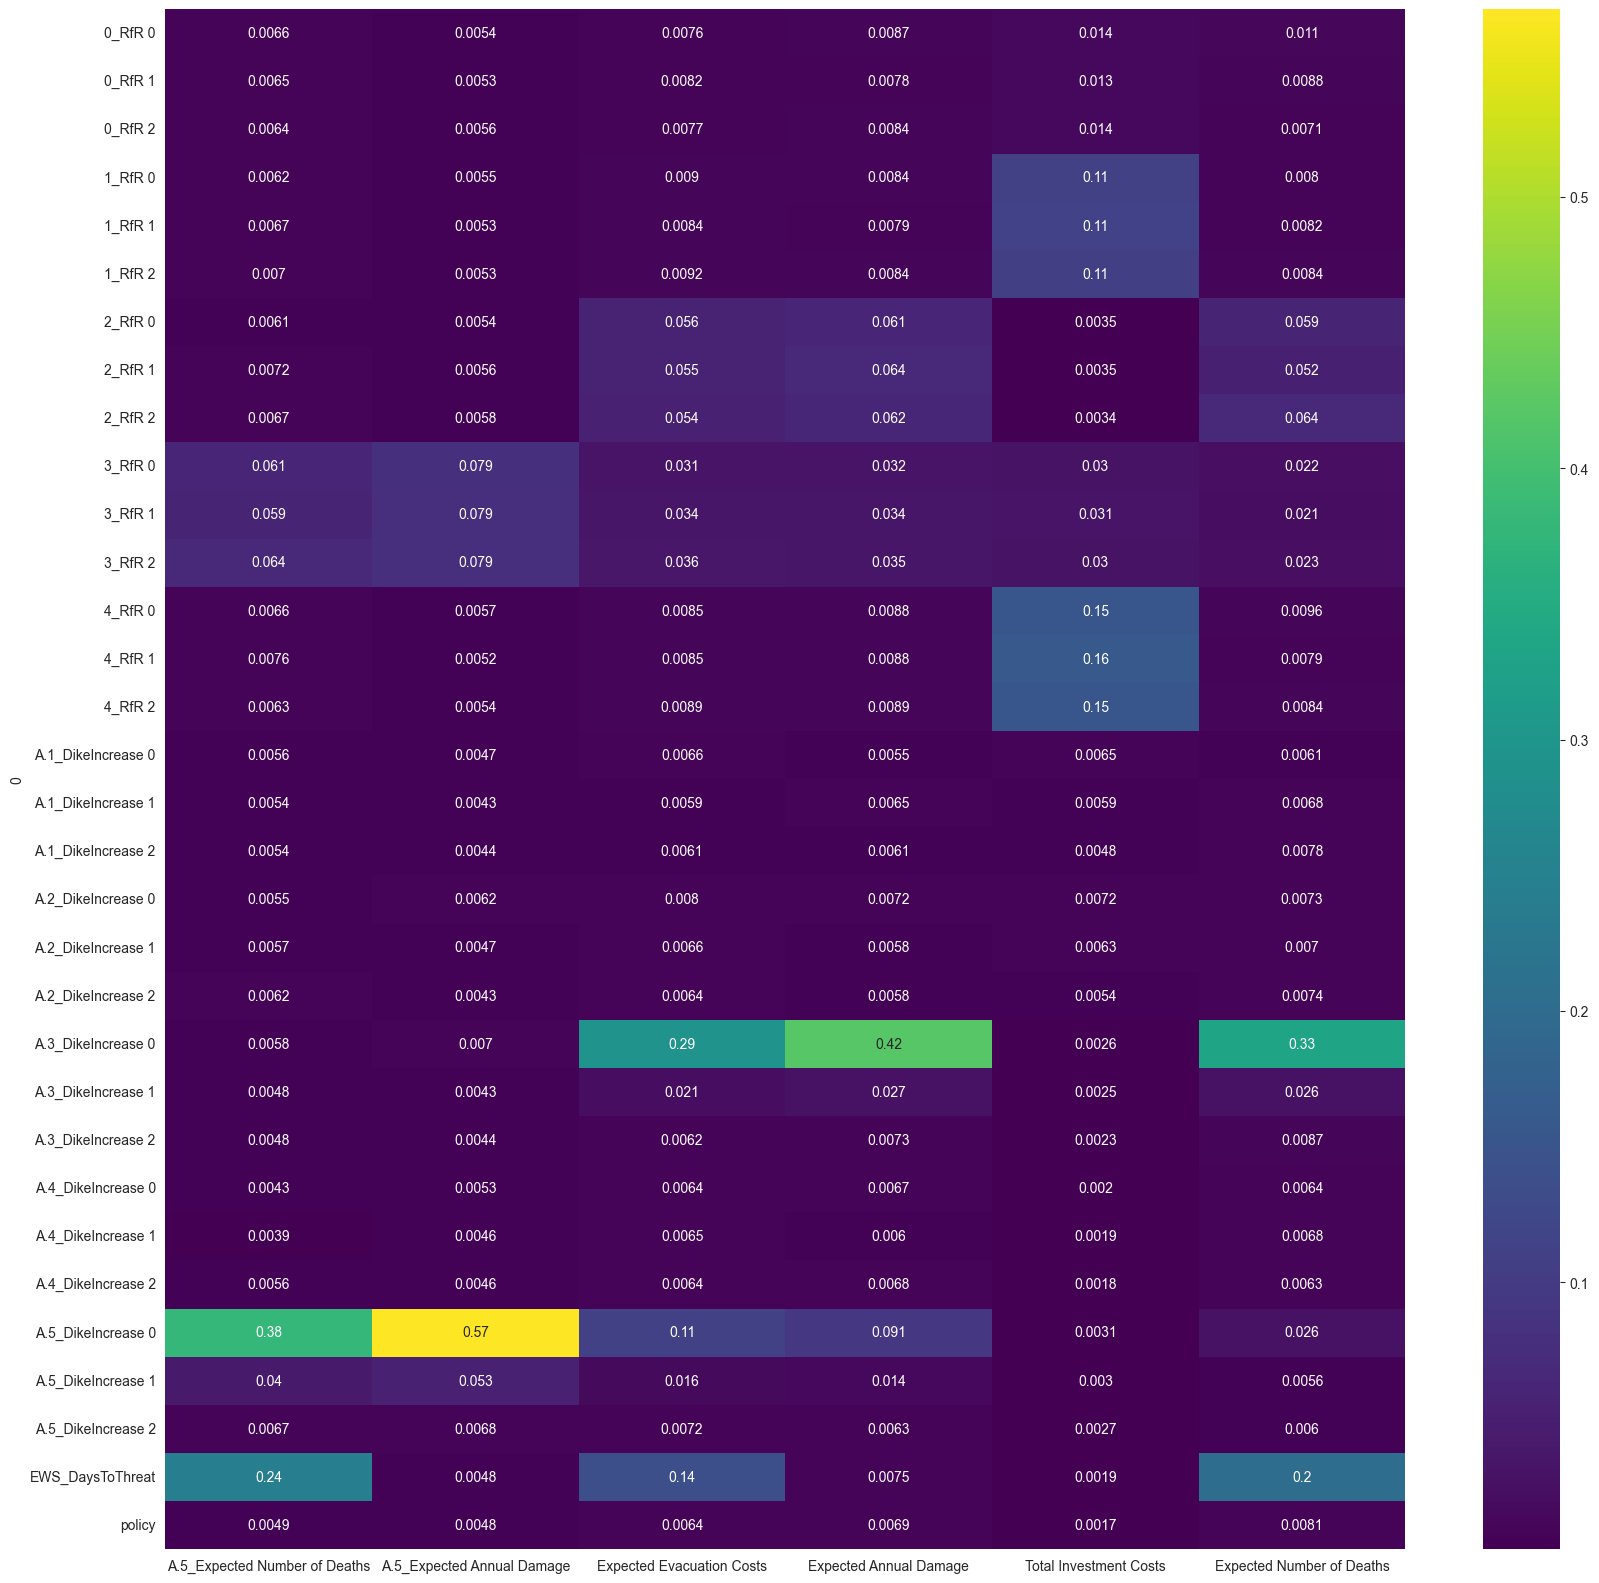

In [7]:
# Selects the columns that contain the levers
experiments_unc = experiments.iloc[:, 19:]

# Change outcomes to df 
df = pd.DataFrame(outcomes)

# Calculates and plots the feature scores
x = experiments_unc
y = df
fig, ax = plt.subplots(figsize=(20,20))
fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap="viridis", annot=True,ax=ax)
plt.show()

In [8]:
# Selects the 20% percentage the worst outcomes for Expected Evacuation Costs
y = (df["Expected Evacuation Costs"] >= list(np.sort(df["Expected Evacuation Costs"]))[int(0.80 * len(df["Expected Evacuation Costs"]))])

# Calculates and plots the feature scores for the worse scenarios for Expected Evacuation Costs
fs, alg = feature_scoring.get_ex_feature_scores(x, y, mode=RuleInductionType.CLASSIFICATION)
fs.sort_values(ascending=False, by=1).head(10)

,1
0,
A.5_DikeIncrease 0,0.332626
EWS_DaysToThreat,0.190242
A.3_DikeIncrease 0,0.150017
3_RfR 2,0.035344
3_RfR 0,0.035287
3_RfR 1,0.034444
2_RfR 0,0.016865
2_RfR 2,0.015764
2_RfR 1,0.015215


In [9]:
# Selects the 20% percentage the worst outcomes for A5 specific outcomes 
y = ((df["A.5_Expected Number of Deaths"] > list(np.sort(df["A.5_Expected Number of Deaths"]))[np.int64(0.80* len(df["A.5_Expected Number of Deaths"]))])|(df['A.5_Expected Annual Damage'] > list(np.sort(df['A.5_Expected Annual Damage']))[np.int64(0.80* len(df['A.5_Expected Annual Damage']))]))

# Calculates and plots the feature scores for the worst outcomes for A5 specific outcomes 
fs, alg = feature_scoring.get_ex_feature_scores(x, y, mode=RuleInductionType.CLASSIFICATION)
fs.sort_values(ascending=False, by=1).head(10)

,1
0,
A.5_DikeIncrease 0,0.682411
3_RfR 0,0.032443
3_RfR 1,0.032254
3_RfR 2,0.030523
EWS_DaysToThreat,0.028583
A.3_DikeIncrease 0,0.016369
A.5_DikeIncrease 1,0.012887
A.2_DikeIncrease 0,0.010455
2_RfR 2,0.007483


In [10]:
# Selects the 20% percentage the worst outcomes for the general situation
y = ((df['Expected Number of Deaths'] > list(np.sort(df["Expected Number of Deaths"]))[np.int64(0.8* len(df['Expected Number of Deaths']))])
     |(df['Expected Annual Damage'] > list(np.sort(df["Expected Annual Damage"]))[np.int64(0.8* len(df['Expected Annual Damage']))]))

# Calculates and plots the feature scores for the worst outcomes for A5 specific outcomes 
fs, alg = feature_scoring.get_ex_feature_scores(x, y, mode=RuleInductionType.CLASSIFICATION)
fs.sort_values(ascending=False, by=1).head(10)

,1
0,
A.5_DikeIncrease 0,0.290296
A.3_DikeIncrease 0,0.258514
EWS_DaysToThreat,0.085880
3_RfR 0,0.041527
3_RfR 2,0.039652
3_RfR 1,0.038201
2_RfR 0,0.019484
2_RfR 1,0.019108
2_RfR 2,0.019060
